In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
dataset = pd.read_csv("/media/kmdr7/Seagate/DATASETS/IOT-23/Merged/dataset.csv")
dataset

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,33373221,94,93,149.0,132596.0,149.0,0.0,1.585106,15.368177,...,32,7219146.0,0.0,7219146.0,7219146.0,5.151346e+14,8.922393e+14,1.545404e+15,8.160091e+06,Malware
1,6,123180,5,3,0.0,4344.0,0.0,0.0,0.000000,0.000000,...,32,0.0,0.0,0.0,0.0,1.545404e+15,0.000000e+00,1.545404e+15,1.545404e+15,Malware
2,6,8519800,98,93,151.0,134140.0,151.0,0.0,1.540816,15.253303,...,32,0.0,0.0,0.0,0.0,1.545404e+15,0.000000e+00,1.545404e+15,1.545404e+15,Malware
3,6,999109,66,65,148.0,91961.0,148.0,0.0,2.242424,18.217541,...,32,0.0,0.0,0.0,0.0,1.545404e+15,0.000000e+00,1.545404e+15,1.545404e+15,Malware
4,6,4116407,72,69,148.0,97855.0,148.0,0.0,2.055556,17.441967,...,32,0.0,0.0,0.0,0.0,1.545404e+15,0.000000e+00,1.545404e+15,1.545404e+15,Malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17909,6,1072,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,...,32,0.0,0.0,0.0,0.0,1.537536e+15,0.000000e+00,1.537536e+15,1.537536e+15,Benign
17910,6,3408,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,...,32,0.0,0.0,0.0,0.0,1.537528e+15,0.000000e+00,1.537528e+15,1.537528e+15,Benign
17911,17,11419,1,1,40.0,56.0,40.0,40.0,40.000000,0.000000,...,8,0.0,0.0,0.0,0.0,1.537535e+15,0.000000e+00,1.537535e+15,1.537535e+15,Benign
17912,6,1693,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,...,32,0.0,0.0,0.0,0.0,1.537530e+15,0.000000e+00,1.537530e+15,1.537530e+15,Benign


In [4]:
label = dataset[["Label"]]
label

,Label
0,Malware
1,Malware
2,Malware
3,Malware
4,Malware
...,...
17909,Benign
17910,Benign
17911,Benign
17912,Benign


In [5]:
clean_dataset = dataset.drop(["Label"], axis=1)
clean_dataset

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,6,33373221,94,93,149.0,132596.0,149.0,0.0,1.585106,15.368177,...,1,32,7219146.0,0.0,7219146.0,7219146.0,5.151346e+14,8.922393e+14,1.545404e+15,8.160091e+06
1,6,123180,5,3,0.0,4344.0,0.0,0.0,0.000000,0.000000,...,0,32,0.0,0.0,0.0,0.0,1.545404e+15,0.000000e+00,1.545404e+15,1.545404e+15
2,6,8519800,98,93,151.0,134140.0,151.0,0.0,1.540816,15.253303,...,1,32,0.0,0.0,0.0,0.0,1.545404e+15,0.000000e+00,1.545404e+15,1.545404e+15
3,6,999109,66,65,148.0,91961.0,148.0,0.0,2.242424,18.217541,...,1,32,0.0,0.0,0.0,0.0,1.545404e+15,0.000000e+00,1.545404e+15,1.545404e+15
4,6,4116407,72,69,148.0,97855.0,148.0,0.0,2.055556,17.441967,...,1,32,0.0,0.0,0.0,0.0,1.545404e+15,0.000000e+00,1.545404e+15,1.545404e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17909,6,1072,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,32,0.0,0.0,0.0,0.0,1.537536e+15,0.000000e+00,1.537536e+15,1.537536e+15
17910,6,3408,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,32,0.0,0.0,0.0,0.0,1.537528e+15,0.000000e+00,1.537528e+15,1.537528e+15
17911,17,11419,1,1,40.0,56.0,40.0,40.0,40.000000,0.000000,...,0,8,0.0,0.0,0.0,0.0,1.537535e+15,0.000000e+00,1.537535e+15,1.537535e+15
17912,6,1693,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,32,0.0,0.0,0.0,0.0,1.537530e+15,0.000000e+00,1.537530e+15,1.537530e+15


# Min-Max Normalization

In [9]:
scaler = MinMaxScaler()
minmax_dataset = pd.DataFrame(scaler.fit_transform(clean_dataset), columns=clean_dataset.columns)
minmax_dataset

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.352941,0.278110,0.000177,0.000408,2.120444e-07,4.133646e-04,0.034018,0.000000,0.001077,0.008615,...,0.000002,0.727273,0.303469,0.0,0.181664,0.435332,0.273822,0.807669,0.330272,2.022253e-09
1,0.352941,0.001026,0.000008,0.000013,0.000000e+00,1.354231e-05,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.727273,0.000000,0.0,0.000000,0.000000,0.988083,0.000000,0.330273,9.889994e-01
2,0.352941,0.070998,0.000185,0.000408,2.148906e-07,4.181780e-04,0.034475,0.000000,0.001047,0.008551,...,0.000002,0.727273,0.000000,0.0,0.000000,0.000000,0.988083,0.000000,0.330273,9.889994e-01
3,0.352941,0.008326,0.000124,0.000285,2.106213e-07,2.866860e-04,0.033790,0.000000,0.001523,0.010212,...,0.000002,0.727273,0.000000,0.0,0.000000,0.000000,0.988083,0.000000,0.330273,9.889994e-01
4,0.352941,0.034303,0.000135,0.000303,2.106213e-07,3.050604e-04,0.033790,0.000000,0.001396,0.009778,...,0.000002,0.727273,0.000000,0.0,0.000000,0.000000,0.988083,0.000000,0.330273,9.889994e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17909,0.352941,0.000009,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.727273,0.000000,0.0,0.000000,0.000000,0.982628,0.000000,0.023788,9.839642e-01
17910,0.352941,0.000028,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.727273,0.000000,0.0,0.000000,0.000000,0.982623,0.000000,0.023494,9.839594e-01
17911,1.000000,0.000095,0.000000,0.000004,5.692467e-08,1.745786e-07,0.009132,0.027174,0.027174,0.000000,...,0.000000,0.181818,0.000000,0.0,0.000000,0.000000,0.982627,0.000000,0.023742,9.839634e-01
17912,0.352941,0.000014,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.727273,0.000000,0.0,0.000000,0.000000,0.982624,0.000000,0.023557,9.839604e-01


# Z-Score Normalization

In [20]:
std_scaler = StandardScaler()
zscore_dataset = pd.DataFrame(std_scaler.fit_transform(clean_dataset), columns=clean_dataset.columns)
zscore_dataset

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-0.086032,-0.527318,-0.002698,0.036688,-0.013090,0.045274,-0.016501,-0.290328,-0.551388,-0.316275,...,-0.01378,0.984293,5.225455,-0.385095,2.536380,5.777139,-0.565516,1.032368,-0.434590,-0.790190
1,-0.086032,-1.203251,-0.017665,-0.016103,-0.013109,-0.008168,-0.587212,-0.290328,-0.569358,-0.496076,...,-0.01395,0.984293,-0.360127,-0.385095,-0.474372,-0.247344,1.208210,-1.138499,-0.434586,1.267674
2,-0.086032,-1.032558,-0.002025,0.036688,-0.013089,0.045917,-0.008840,-0.290328,-0.551890,-0.317619,...,-0.01378,0.984293,-0.360127,-0.385095,-0.474372,-0.247344,1.208210,-1.138499,-0.434586,1.267674
3,-0.086032,-1.185445,-0.007407,0.020264,-0.013090,0.028341,-0.020331,-0.290328,-0.543936,-0.282939,...,-0.01378,0.984293,-0.360127,-0.385095,-0.474372,-0.247344,1.208210,-1.138499,-0.434585,1.267674
4,-0.086032,-1.122074,-0.006398,0.022610,-0.013090,0.030797,-0.020331,-0.290328,-0.546055,-0.292013,...,-0.01378,0.984293,-0.360127,-0.385095,-0.474372,-0.247344,1.208210,-1.138499,-0.434585,1.267674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17909,-0.086032,-1.205734,-0.018338,-0.017277,-0.013109,-0.009978,-0.587212,-0.290328,-0.569358,-0.496076,...,-0.01395,0.984293,-0.360127,-0.385095,-0.474372,-0.247344,1.194664,-1.138499,-1.243736,1.257197
17910,-0.086032,-1.205686,-0.018338,-0.017277,-0.013109,-0.009978,-0.587212,-0.290328,-0.569358,-0.496076,...,-0.01395,0.984293,-0.360127,-0.385095,-0.474372,-0.247344,1.194651,-1.138499,-1.244512,1.257187
17911,1.967134,-1.205523,-0.018338,-0.017277,-0.013104,-0.009955,-0.434001,0.278256,-0.115879,-0.496076,...,-0.01395,-0.730637,-0.360127,-0.385095,-0.474372,-0.247344,1.194662,-1.138499,-1.243858,1.257196
17912,-0.086032,-1.205721,-0.018338,-0.017277,-0.013109,-0.009978,-0.587212,-0.290328,-0.569358,-0.496076,...,-0.01395,0.984293,-0.360127,-0.385095,-0.474372,-0.247344,1.194654,-1.138499,-1.244345,1.257189


# Perbandingan Sebelum dan Sesudah Normalisasi

## Sebelum

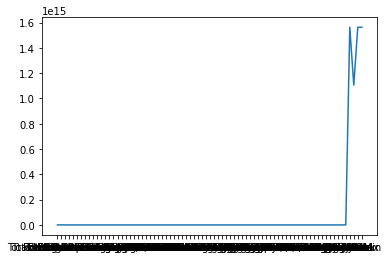

In [14]:
plt.plot(clean_dataset.max())

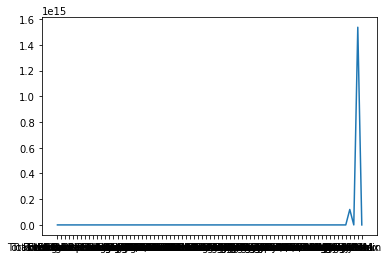

In [15]:
plt.plot(clean_dataset.min())

## Sesudah (Min-Max)

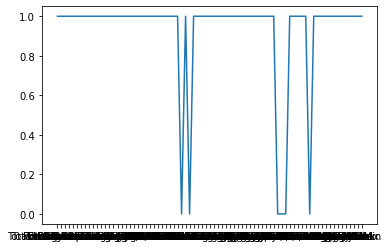

In [16]:
plt.plot(minmax_dataset.max())

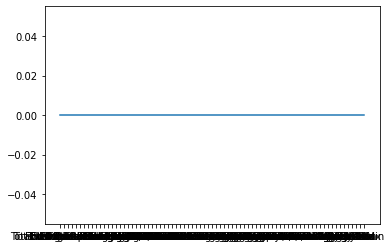

In [17]:
plt.plot(minmax_dataset.min())

## Sesudah (Z-Score)

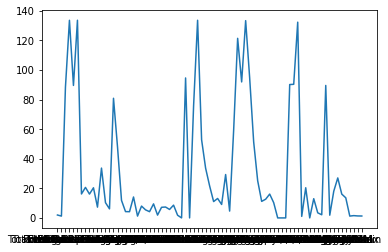

In [21]:
plt.plot(zscore_dataset.max())

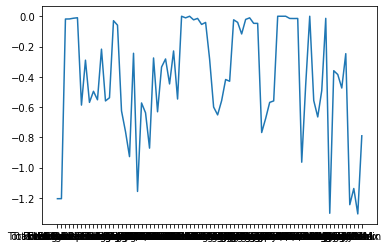

In [22]:
plt.plot(zscore_dataset.min())

In [23]:
# Gabung kembali label dengan dataset
minmax_dataset["Label"] = label
zscore_dataset["Label"] = label

In [24]:
# Simpan data kedalam bentuk csv
minmax_dataset.to_csv("/media/kmdr7/Seagate/DATASETS/IOT-23/Merged/03. Data Normalization/minmax_dataset.csv", index=False)
zscore_dataset.to_csv("/media/kmdr7/Seagate/DATASETS/IOT-23/Merged/03. Data Normalization/zscore_dataset.csv", index=False)